In [193]:
#data manipulation
import pandas as pd
import numpy as np
import re
import string

#emoji handling
import demoji

#text processing
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from textblob import TextBlob

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yigit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yigit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yigit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yigit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [195]:
stop_words = set(stopwords.words('english'))

In [196]:
df = pd.read_csv('TSLAtweets.csv')

In [197]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...
1,1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i..."
2,2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...
3,3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc..."
4,4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...


In [198]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)
df.set_index('index',inplace=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20000 non-null  object
 1   User    20000 non-null  object
 2   Tweet   20000 non-null  object
dtypes: object(3)
memory usage: 625.0+ KB


In [200]:
df['Date'].max()

'2022-09-30 23:43:11+00:00'

In [201]:
df['Date'].min()

'2022-05-19 04:56:01+00:00'

In [202]:
df['wordcount_bc']=df['Tweet'].map(lambda x:len(x.split()))
df.head()

,Date,User,Tweet,wordcount_bc
index,,,,
0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...,16
1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i...",12
2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...,7
3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc...",21
4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...,40


## Tweet text temizliği öncesi kelime dağılımı

In [203]:
pd.DataFrame(df['wordcount_bc'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_bc,20000.0,24.7188,13.501305,2.0,14.0,22.0,35.0,88.0


<AxesSubplot:xlabel='wordcount_bc', ylabel='Count'>

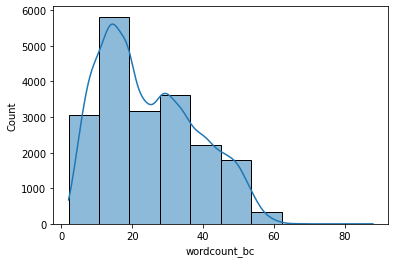

In [204]:
sns.histplot(data=df['wordcount_bc'],bins=10,kde=True)

## Cleaning text

In [213]:
def CleanTXT(text):
    text = text.lower() # text lowered
    
    text = demoji.replace(text,"") # emojis removed
    
    text = re.sub(r'\n',' ',text) # remove \n
    
    text= text.translate(str.maketrans("","",string.punctuation)) #punctuation removed
    
    text = re.sub(r'@[A-Za-z0-9]','',text) # @mentions removed
    
    text = re.sub(r'\@\w+|\#','',text) # remove hashtags and @ mentions 

    #https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
    text = re.sub(r'https?:\/\/\S+','',text,flags=re.MULTILINE) # remove link 
    
    #filtering stopwords
    filtered_words = [word for word in TextBlob(text).words if word not in stop_words]
    
    #lemmatization
    lemmatized_words = [word.lemmatize('v') for word in filtered_words]
    
    #stemming
    #stemmed_words = [word.stem() for word in lemmatized_words]
    
    return " ".join(lemmatized_words)

In [214]:
%%time
df['cleanTweet'] = df['Tweet'].map(CleanTXT) 
    

Wall time: 21.6 s


In [217]:
df['wordcount_ac']=df['cleanTweet'].map(lambda x:len(x.split()))
df.head()

,Date,User,Tweet,wordcount_bc,cleanTweet,wordcount_ac
index,,,,,,
0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...,16,wait ai day day ️ tsla aiday2022 lasvegas gyml...,13
1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i...",12,tesla inc tsla price close 20220930 26525 tesl...,10
2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...,7,helloimmorgan ’ sell everything buy tsla https...,7
3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc...",21,totally elonmusk break song lol buy bitch ’ go...,13
4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...,40,new electric sedan 27k check shenlan sl03 rece...,31


In [218]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [219]:
df['Subjectivity']= df['cleanTweet'].map(getSubjectivity)
df['Polarity']=df['cleanTweet'].map(getPolarity)

In [220]:
df.head()

,Date,User,Tweet,wordcount_bc,cleanTweet,wordcount_ac,Subjectivity,Polarity
index,,,,,,,,
0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...,16,wait ai day day ️ tsla aiday2022 lasvegas gyml...,13,0.000000,0.000000
1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i...",12,tesla inc tsla price close 20220930 26525 tesl...,10,0.000000,0.000000
2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...,7,helloimmorgan ’ sell everything buy tsla https...,7,0.000000,0.000000
3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc...",21,totally elonmusk break song lol buy bitch ’ go...,13,0.516667,0.366667
4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...,40,new electric sedan 27k check shenlan sl03 rece...,31,0.301136,0.127841


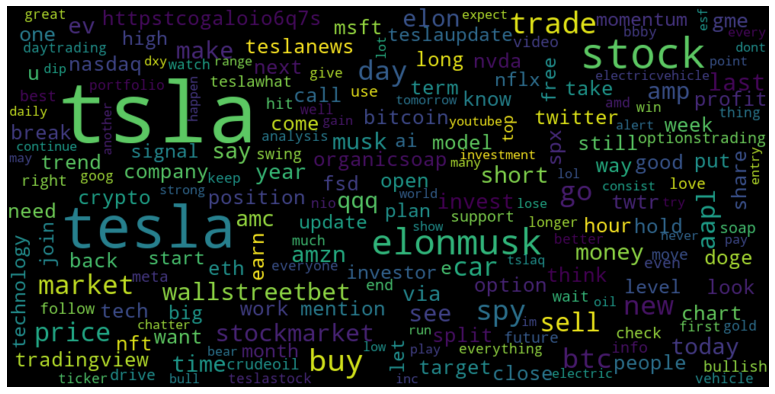

In [222]:
# ploting word cloud

allWords = ' '.join([twts for twts in df['cleanTweet']])
wordCloud = WordCloud(width= 1000,height=500,random_state=35,max_font_size=110,collocations=False).generate(allWords)

figure = plt.figure(figsize=(15,7))
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [223]:
!pigar

^C
